# Customer Churn Prediction

<img src='img2.png' style='width=100%'>

# <font color = red>3 - Classification</font>

In [1]:
import numpy as np
import pandas as pd
from pickle import dump
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , f1_score,precision_score,recall_score,fbeta_score

In [25]:
df = pd.read_csv('Churn_vis.csv',index_col=0)

# Encoding and Scaling

In [26]:
#drop zip code and 3 last cols
#drop first=true
print(df.shape)
df=pd.get_dummies(df,drop_first=True)
y=df['Churn Value']
X=df.drop(['Churn Value'],axis=1)

(7032, 21)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [28]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
#split before normalizing 

# Model Selection

In [6]:
Models=pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
classifiers=[]

## KNN

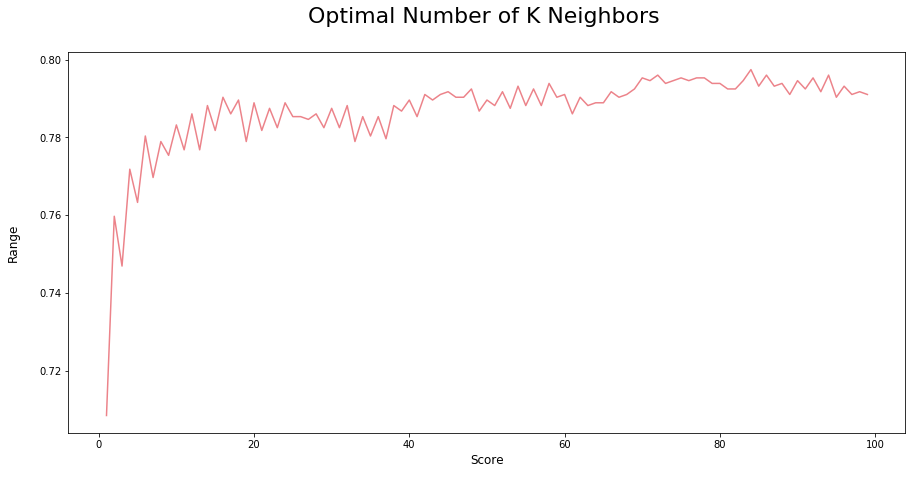

In [7]:
from sklearn.neighbors import KNeighborsClassifier
score_array = []
for each in range(1,100):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center", fontstyle = "normal", fontsize = "large")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large")
plt.title('Optimal Number of K Neighbors \n', horizontalalignment="center", fontstyle = "normal",fontsize = "22")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [8]:

knn=KNeighborsClassifier(n_neighbors=86)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
result=pd.DataFrame([['KNN',acc,prec,rec,f1,f2]],columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
Models=Models.append(result,ignore_index=True)
classifiers.append(knn)
Models

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,KNN,0.79602,0.589744,0.591429,0.590585,0.591091


              precision    recall  f1-score   support

           0   0.864583  0.863765  0.864174      1057
           1   0.589744  0.591429  0.590585       350

    accuracy                       0.796020      1407
   macro avg   0.727163  0.727597  0.727380      1407
weighted avg   0.796215  0.796020  0.796117      1407



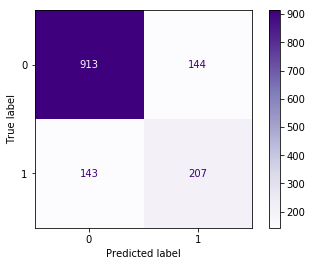

In [9]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(knn,X_test,y_test,cmap="Purples")

y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred,digits=6))

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log = LogisticRegression(random_state=0)
param =  {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : np.linspace(0,10, 100),
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100,1000, 2000, 3000]}
grid = GridSearchCV(log, param_grid=param, cv =5, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 7.979797979797979,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [11]:
log = LogisticRegression(random_state=0, C=7.979797979797979, penalty = 'l1', solver='liblinear',max_iter=100)
log.fit(X_train,y_train)

y_pred = log.predict(X_test)
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
result=pd.DataFrame([['Logistic Regression',acc,prec,rec,f1,f2]],columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
Models=Models.append(result,ignore_index=True)
classifiers.append(log)
Models

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,KNN,0.796020,0.589744,0.591429,0.590585,0.591091
1,Logistic Regression,0.807392,0.624606,0.565714,0.593703,0.576587


              precision    recall  f1-score   support

           0   0.860550  0.887417  0.873777      1057
           1   0.624606  0.565714  0.593703       350

    accuracy                       0.807392      1407
   macro avg   0.742578  0.726566  0.733740      1407
weighted avg   0.801858  0.807392  0.804107      1407



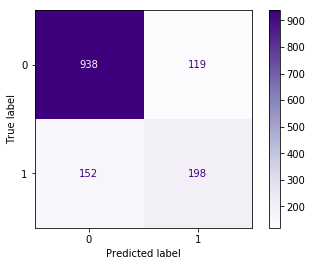

In [12]:
plot_confusion_matrix(log,X_test,y_test,cmap="Purples")
y_pred=log.predict(X_test)
print(classification_report(y_test, y_pred,digits=6))

## Naive Bayes Classifiers

In [7]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      }
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'bernoulli': 0.7386666666666667, 'gaussian': 0.6933333333333332}

In [13]:
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()
nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
result=pd.DataFrame([['Naive Bayes',acc,prec,rec,f1,f2]],columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
Models=Models.append(result,ignore_index=True)
classifiers.append(nb_model)
Models

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,KNN,0.796020,0.589744,0.591429,0.590585,0.591091
1,Logistic Regression,0.807392,0.624606,0.565714,0.593703,0.576587
2,Naive Bayes,0.732054,0.476844,0.794286,0.595927,0.700958


              precision    recall  f1-score   support

           0   0.912621  0.711447  0.799575      1057
           1   0.476844  0.794286  0.595927       350

    accuracy                       0.732054      1407
   macro avg   0.694733  0.752867  0.697751      1407
weighted avg   0.804219  0.732054  0.748916      1407



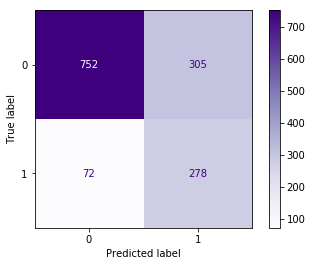

In [14]:
plot_confusion_matrix(nb_model,X_test,y_test,cmap="Purples")
y_pred=nb_model.predict(X_test)
print(classification_report(y_test, y_pred,digits=6))

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10),
             'max_leaf_nodes': [None, 3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
             }
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(random_state=3), param_grid=param_grid, cv=10 )
grid.fit(X_train, y_train )
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 15}

In [16]:
DT = DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=6, max_leaf_nodes = 23 )
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
result=pd.DataFrame([['Decision Tree',acc,prec,rec,f1,f2]],columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
Models=Models.append(result,ignore_index=True)
classifiers.append(DT)
Models

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,KNN,0.796020,0.589744,0.591429,0.590585,0.591091
1,Logistic Regression,0.807392,0.624606,0.565714,0.593703,0.576587
2,Naive Bayes,0.732054,0.476844,0.794286,0.595927,0.700958
3,Decision Tree,0.791756,0.612648,0.442857,0.514096,0.468845


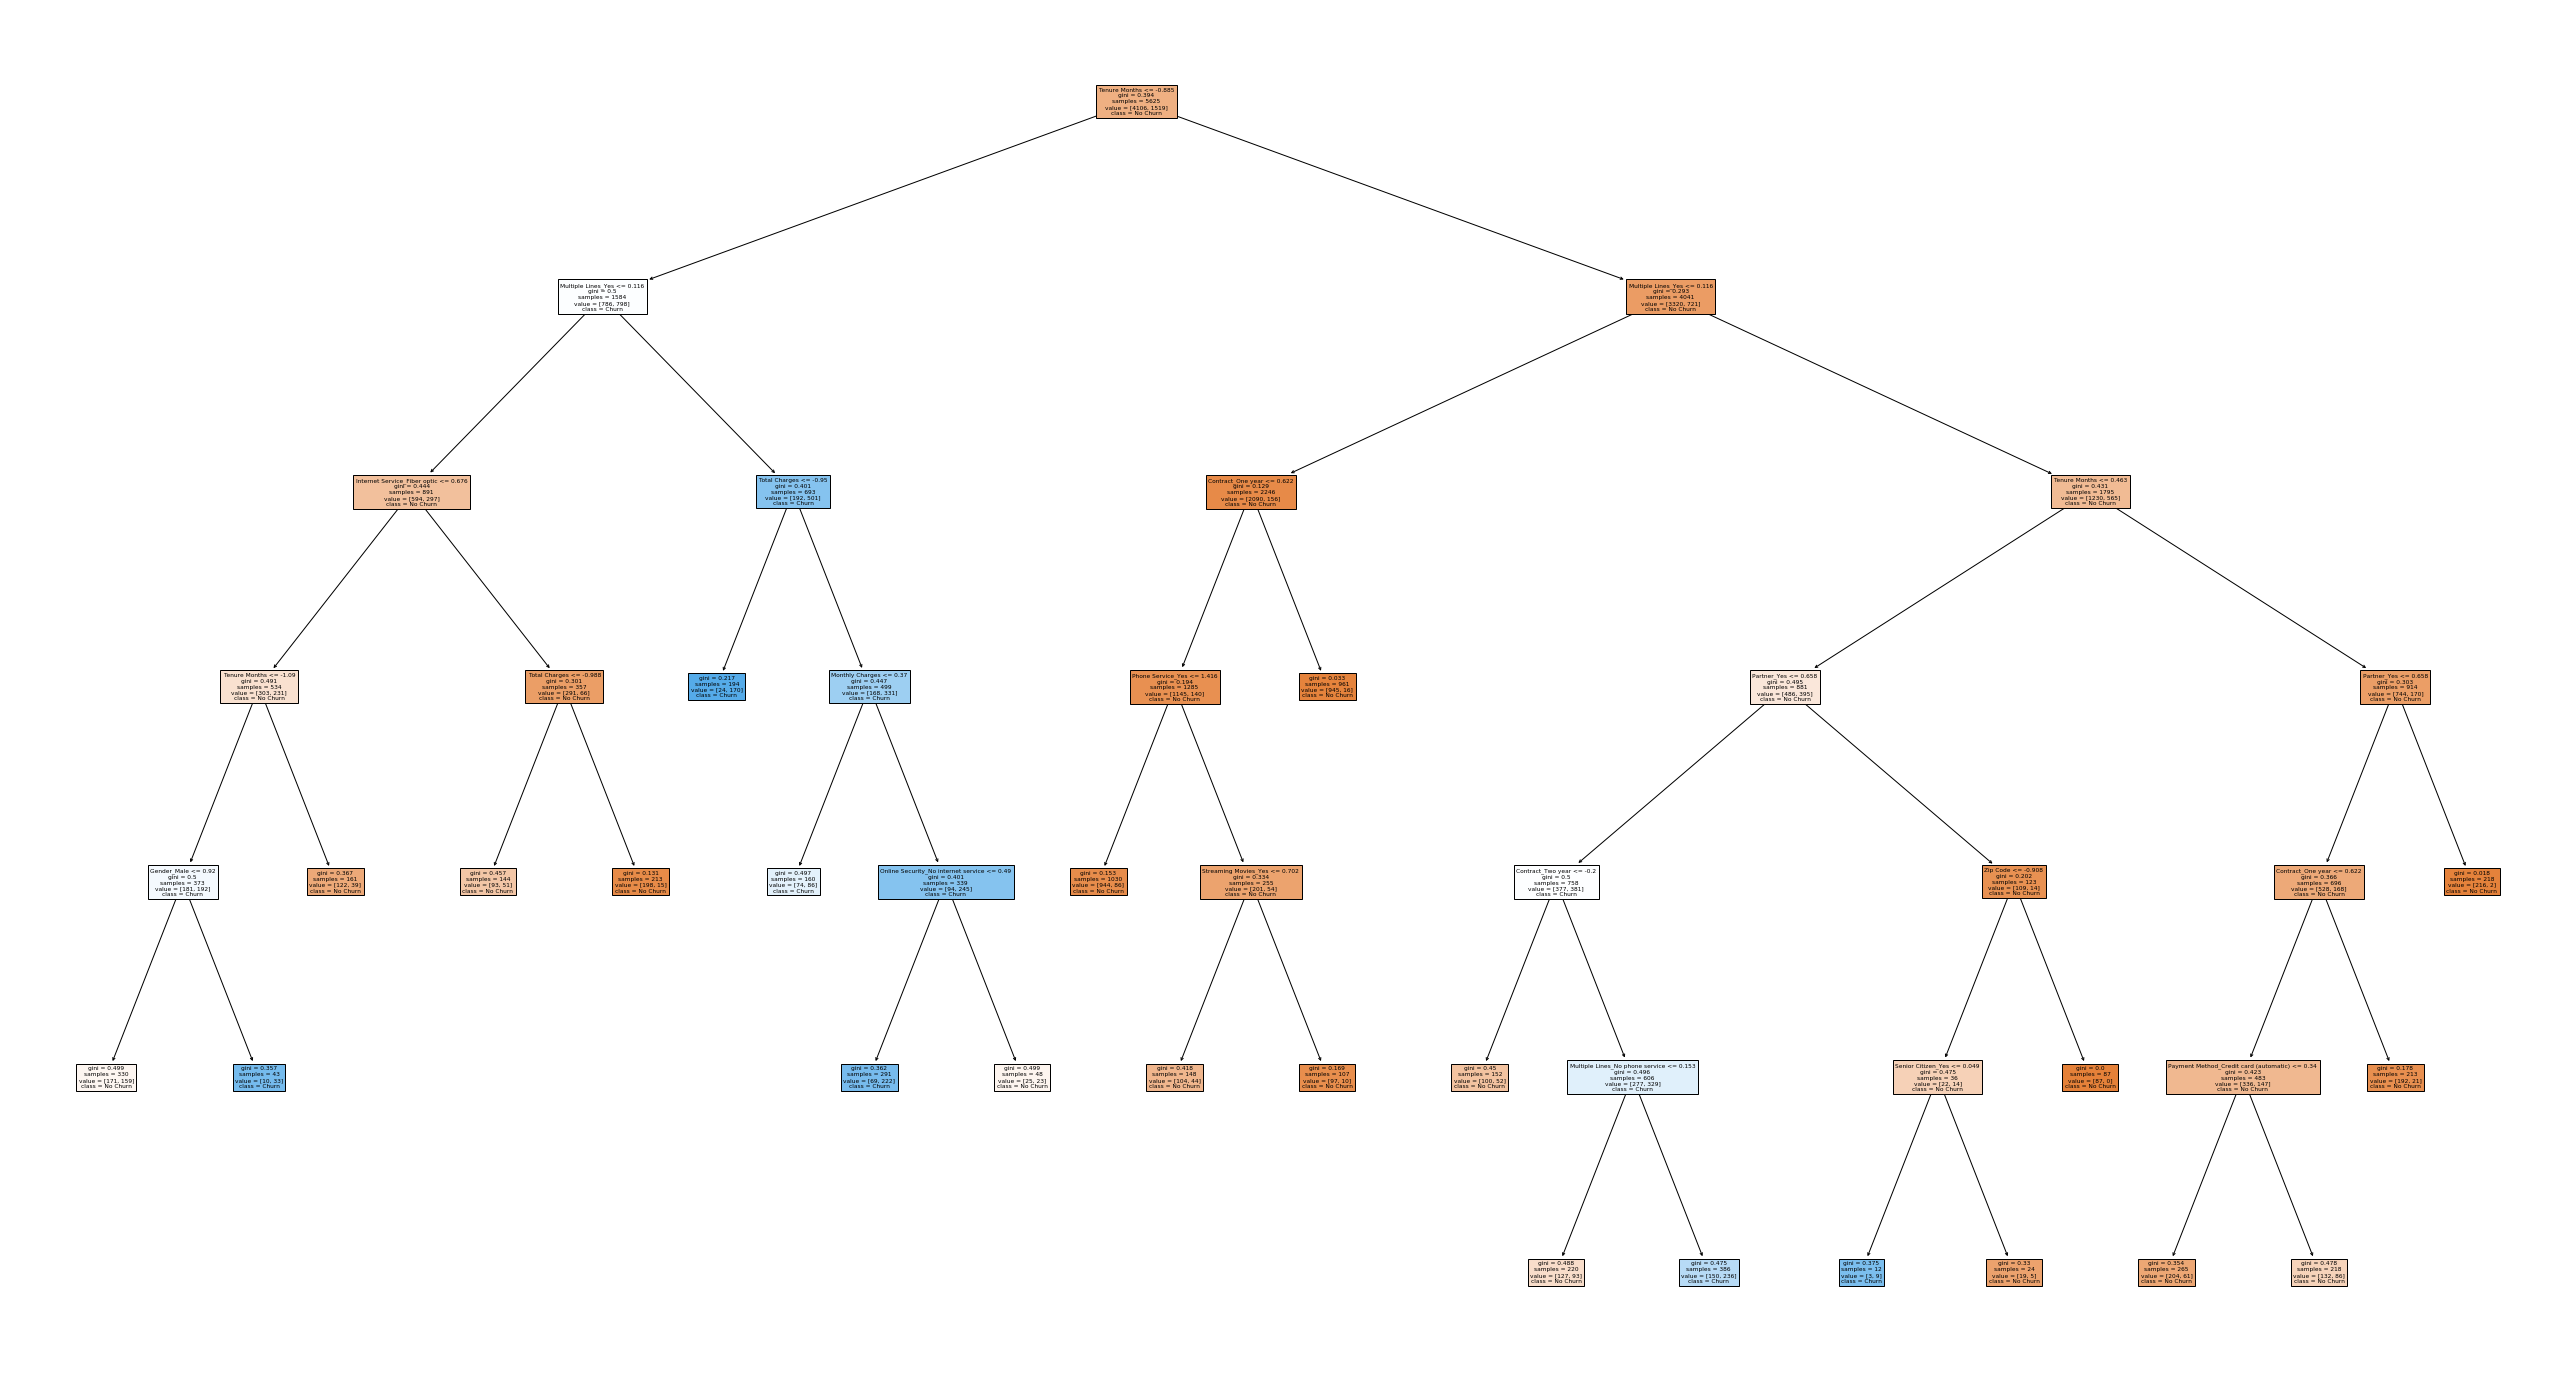

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(45,25))
plot_tree(DT, feature_names= df.columns, class_names=['No Churn','Churn'], filled=True)
plt.show()


              precision    recall  f1-score   support

           0   0.831023  0.907285  0.867481      1057
           1   0.612648  0.442857  0.514096       350

    accuracy                       0.791756      1407
   macro avg   0.721835  0.675071  0.690788      1407
weighted avg   0.776701  0.791756  0.779574      1407



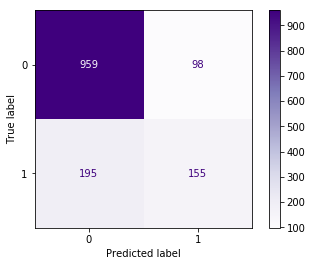

In [19]:
plot_confusion_matrix(DT,X_test,y_test,cmap="Purples")
y_pred=DT.predict(X_test)
print(classification_report(y_test, y_pred,digits=6))

## Random Forest

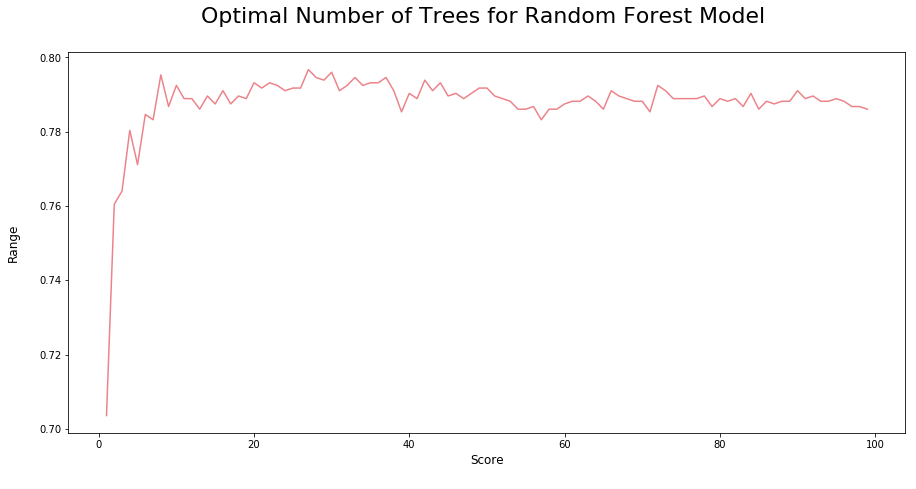

In [20]:
from sklearn.ensemble import RandomForestClassifier
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [21]:

RF= RandomForestClassifier(n_estimators=30)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
result=pd.DataFrame([['Random Forest',acc,prec,rec,f1,f2]],columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
Models=Models.append(result,ignore_index=True)
classifiers.append(RF)
Models

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,KNN,0.796020,0.589744,0.591429,0.590585,0.591091
1,Logistic Regression,0.807392,0.624606,0.565714,0.593703,0.576587
2,Naive Bayes,0.732054,0.476844,0.794286,0.595927,0.700958
3,Decision Tree,0.791756,0.612648,0.442857,0.514096,0.468845
4,Random Forest,0.780384,0.568562,0.485714,0.523883,0.500294


              precision    recall  f1-score   support

           0   0.837545  0.877956  0.857275      1057
           1   0.568562  0.485714  0.523883       350

    accuracy                       0.780384      1407
   macro avg   0.703053  0.681835  0.690579      1407
weighted avg   0.770634  0.780384  0.774342      1407



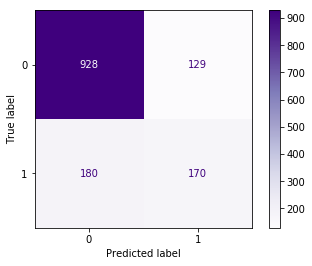

In [22]:
plot_confusion_matrix(RF,X_test,y_test,cmap="Purples")
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred,digits=6))

## XGBoost

In [23]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid = GridSearchCV(XGB, param_grid=parameters, cv =5, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [24]:

XGB = XGBClassifier(learning_rate= 0.1,max_depth= 3,n_estimators= 100)
XGB.fit(X_train,y_train)

y_pred = XGB.predict(X_test)
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
result=pd.DataFrame([['XGBoost',acc,prec,rec,f1,f2]],columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
Models=Models.append(result,ignore_index=True)
classifiers.append(XGB)
Models

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,KNN,0.796020,0.589744,0.591429,0.590585,0.591091
1,Logistic Regression,0.807392,0.624606,0.565714,0.593703,0.576587
2,Naive Bayes,0.732054,0.476844,0.794286,0.595927,0.700958
3,Decision Tree,0.791756,0.612648,0.442857,0.514096,0.468845
4,Random Forest,0.780384,0.568562,0.485714,0.523883,0.500294
5,XGBoost,0.810235,0.634304,0.560000,0.594841,0.573435


              precision    recall  f1-score   support

           0   0.859745  0.893094  0.876102      1057
           1   0.634304  0.560000  0.594841       350

    accuracy                       0.810235      1407
   macro avg   0.747025  0.726547  0.735471      1407
weighted avg   0.803665  0.810235  0.806137      1407



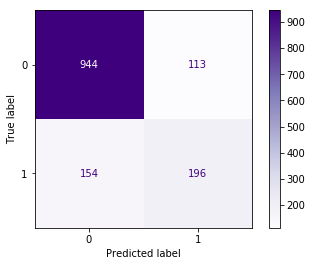

In [25]:
plot_confusion_matrix(XGB,X_test,y_test,cmap="Purples")
y_pred=XGB.predict(X_test)
print(classification_report(y_test, y_pred,digits=6))

## SVC Classification



In [26]:
from sklearn.svm import SVC
SVM=SVC()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
grid = GridSearchCV(SVM, param_grid=tuned_parameters, cv =5, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [27]:

SVM=SVC(kernel='rbf',C=100,gamma= 0.001,probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
result=pd.DataFrame([['SVC',acc,prec,rec,f1,f2]],columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
Models=Models.append(result,ignore_index=True)
classifiers.append(SVM)
Models

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,KNN,0.796020,0.589744,0.591429,0.590585,0.591091
1,Logistic Regression,0.807392,0.624606,0.565714,0.593703,0.576587
2,Naive Bayes,0.732054,0.476844,0.794286,0.595927,0.700958
3,Decision Tree,0.791756,0.612648,0.442857,0.514096,0.468845
4,Random Forest,0.780384,0.568562,0.485714,0.523883,0.500294
5,XGBoost,0.810235,0.634304,0.560000,0.594841,0.573435
6,SVC,0.805970,0.635088,0.517143,0.570079,0.537092


              precision    recall  f1-score   support

           0   0.849376  0.901608  0.874713      1057
           1   0.635088  0.517143  0.570079       350

    accuracy                       0.805970      1407
   macro avg   0.742232  0.709376  0.722396      1407
weighted avg   0.796071  0.805970  0.798933      1407



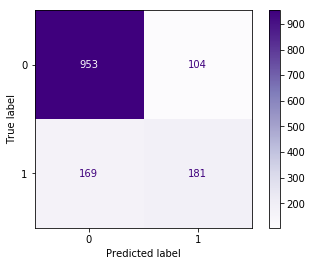

In [28]:
plot_confusion_matrix(SVM,X_test,y_test,cmap="Purples")
y_pred=SVM.predict(X_test)
print(classification_report(y_test, y_pred,digits=6))

# ROC Curve

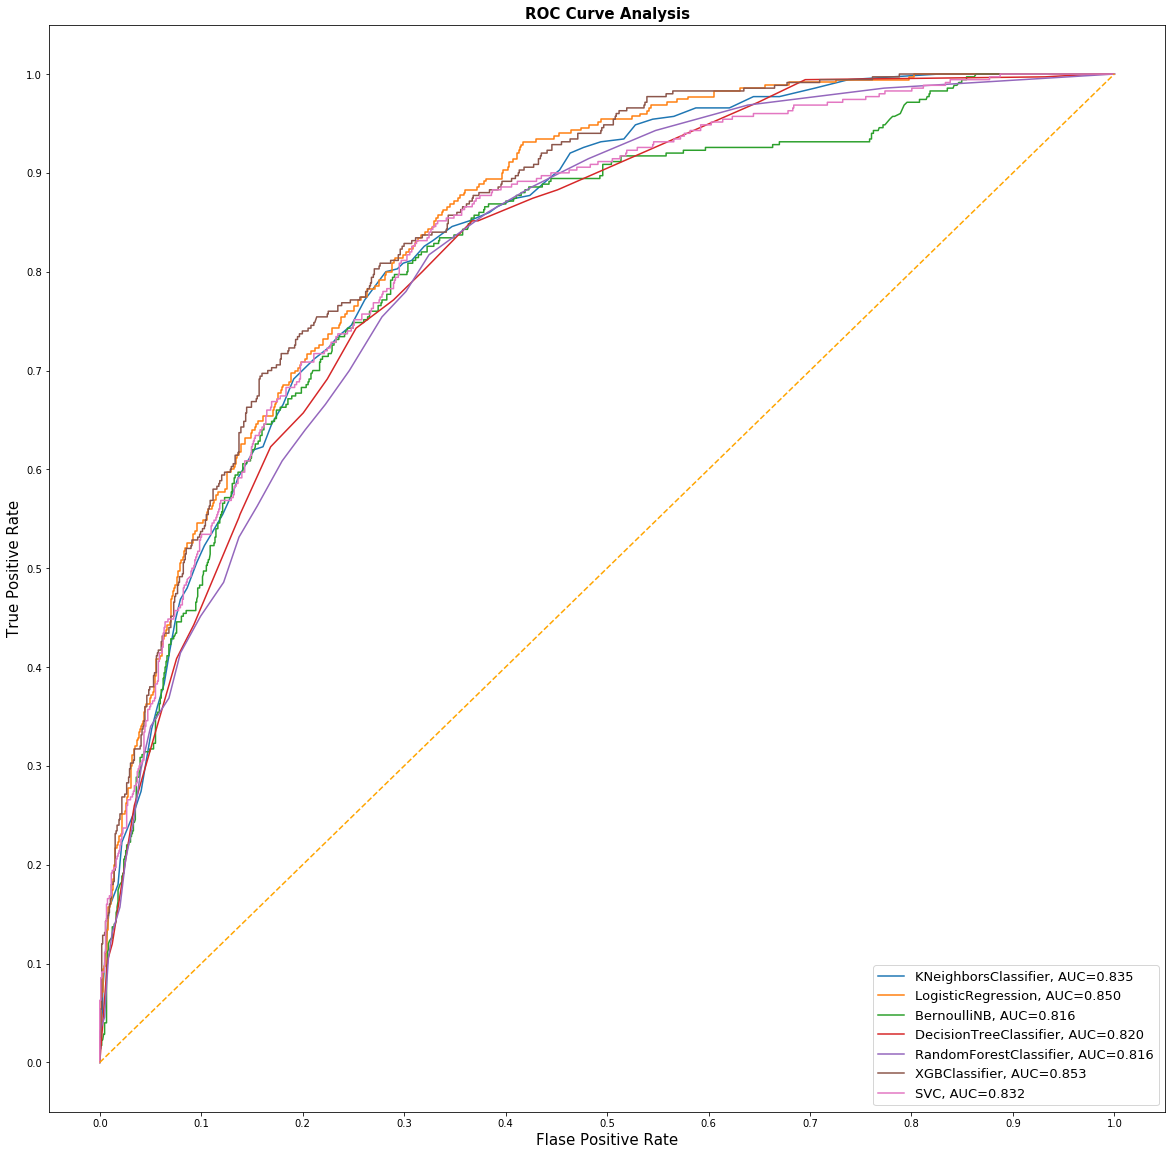

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    
    yproba = cls.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(20,20))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Model Evaluation

In [30]:
Models.sort_values('Accuracy',ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
5,XGBoost,0.810235,0.634304,0.560000,0.594841,0.573435
1,Logistic Regression,0.807392,0.624606,0.565714,0.593703,0.576587
6,SVC,0.805970,0.635088,0.517143,0.570079,0.537092
0,KNN,0.796020,0.589744,0.591429,0.590585,0.591091
3,Decision Tree,0.791756,0.612648,0.442857,0.514096,0.468845
4,Random Forest,0.780384,0.568562,0.485714,0.523883,0.500294
2,Naive Bayes,0.732054,0.476844,0.794286,0.595927,0.700958


In [29]:
model = XGBClassifier(learning_rate= 0.1,max_depth= 3,n_estimators= 100)
model.fit(X_train,y_train)

XGBClassifier()

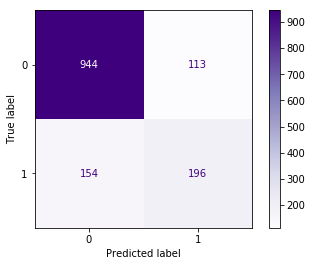

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test,cmap="Purples")

In [33]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred,digits=6))


              precision    recall  f1-score   support

           0   0.859745  0.893094  0.876102      1057
           1   0.634304  0.560000  0.594841       350

    accuracy                       0.810235      1407
   macro avg   0.747025  0.726547  0.735471      1407
weighted avg   0.803665  0.810235  0.806137      1407



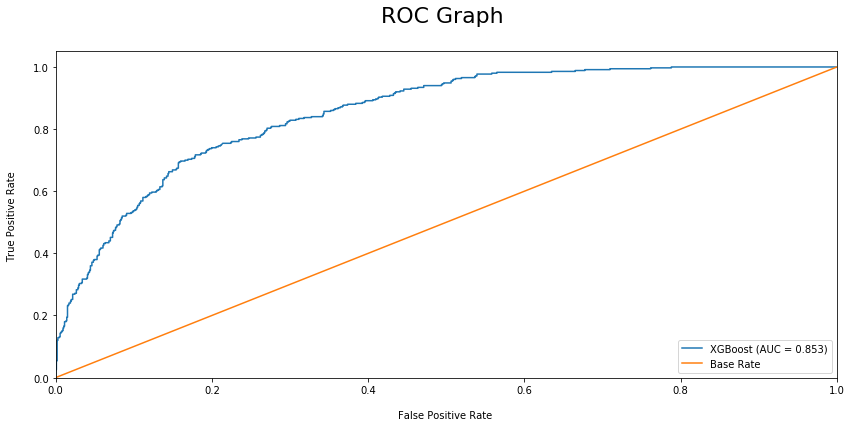

In [34]:
from sklearn.metrics import roc_curve
probs = model.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = roc_auc_score(y_test, probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
plt.plot(rf_fpr, rf_tpr, label='XGBoost (AUC = %0.3f)' % classifier_roc_auc)

plt.plot([0,1], [0,1],label='Base Rate' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

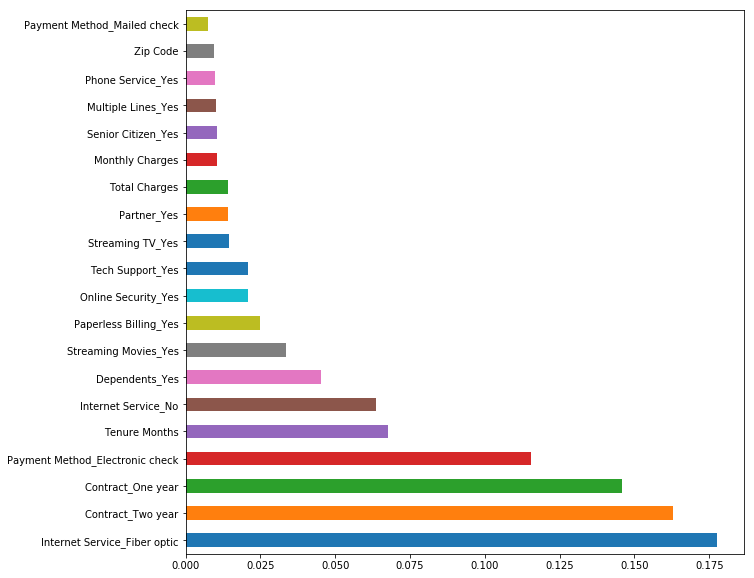

In [38]:
from xgboost import plot_importance


fig, ax = plt.subplots(1,1,figsize=(10,10))

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',ax=ax)

## Saving the model and scaler for deployment 

In [36]:
dump(knn, open('model.pkl', 'wb'))
dump(scaler, open('scaler.pkl', 'wb'))

# Trying a neural network

In [37]:
from sklearn.neural_network import MLPClassifier
clf = clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2),max_iter=1000, random_state=1).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.855831  0.881741  0.868593      1057
           1   0.606918  0.551429  0.577844       350

    accuracy                       0.799574      1407
   macro avg   0.731375  0.716585  0.723219      1407
weighted avg   0.793912  0.799574  0.796267      1407

